In [11]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [12]:
def synthetic_data(w,b,num_examples):
    """生成x=Xw+b+噪音"""
    x=torch.normal(0,1,(num_examples,len(w)))
    y= torch.matmul(x,w)+b
    y+=torch.normal(0,0.01,y.shape)
    return x,y.reshape((-1,1))#转换成column 向量方便后面算梯度
    

In [13]:
t_w=torch.tensor([2,-3.4])
t_b=4.2
features,labels=synthetic_data(t_w,t_b,1000)

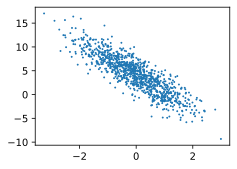

In [16]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),labels.detach().numpy(),1);

In [19]:
def  data_iter(batch_size,features,labels):
    num_examples =len(features)
    indices = list(range(num_examples))
    #打乱indices,随机读取
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        #取出indicies里面的batch_size个元素，如果溢出了，选择num_examples
        batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]
        
batch_size=10
for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

tensor([[-1.5997,  1.5204],
        [ 0.6786,  0.2817],
        [-0.2379,  1.5189],
        [-1.5818,  1.9798],
        [-0.1466, -2.5155],
        [ 0.9698,  1.3832],
        [ 0.2106, -0.3756],
        [ 0.4294,  0.6886],
        [ 1.3154,  0.0674],
        [ 0.8151,  0.7044]]) 
 tensor([[-4.1763],
        [ 4.6068],
        [-1.4297],
        [-5.6876],
        [12.4486],
        [ 1.4253],
        [ 5.8866],
        [ 2.7278],
        [ 6.6112],
        [ 3.4388]])


In [20]:
#模型参数
w=torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

In [30]:
#模型参数
def linreg(X,w,b):
    return torch.matmul(X,w)+b

In [31]:
#损失函数-均方误差
def squared_loss(y_hat,y):
    return(y_hat-y.reshape(y_hat.shape))**2/2

In [32]:
#优化算法，sgd 小规模随机梯度下降
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in  params:
            param-=lr*param.grad/batch_size
            param.grad.zero_()

In [34]:
lr=0.03
num__epochs=3
net = linreg
loss=squared_loss

for epoch in range(num__epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y)#计算x，y的小批量损失
        #l的形状是，[batch_size,1]而非标量，需要将l中的所有元素加子啊一起，来计算[w,b]的梯度
        l.sum().backward()
        sgd([w,b],lr,batch_size)
        
    with torch.no_grad():
        train_l= loss(net(features,w,b),labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000153
epoch 2, loss 0.000057
epoch 3, loss 0.000057
